In [2]:
import torch
import torchaudio
import numpy as np
import pandas as pd

In [3]:
sample_audio = '/work/dpandya/LibriVox_Kaggle/meisterfloh/meisterfloh_0005.wav'
wav, sr = torchaudio.load(sample_audio)

In [29]:
!wget -P audio https://groups.inf.ed.ac.uk/ami//ICSIsignals/NXT/Bdb001.interaction.wav -O audio.wav

--2023-08-14 14:00:48--  https://groups.inf.ed.ac.uk/ami//ICSIsignals/NXT/Bdb001.interaction.wav
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96701996 (92M) [audio/x-wav]
Saving to: 'audio.wav'

wav                 100%[===================>]  92.22M  14.7MB/s    in 7.2s    

2023-08-14 14:00:56 (12.7 MB/s) - 'audio.wav' saved [96701996/96701996]



In [30]:
audio_wav  = 'audio.wav'
wav0, sr0 = torchaudio.load(audio_wav)
wav0.shape

torch.Size([1, 48350976])

In [47]:
import torchaudio.functional as F

window = (int)(sr0 * 0.05)
hop = (int)(sr0 * 0.03)

pitch_list = []

for i in range(0, (int)(len(wav0.squeeze())), hop):
    
    aud_win = wav0.squeeze()[i:(i+window)]
    #print(len(aud_win), aud_win.median())
    pitch = F.detect_pitch_frequency(aud_win.unsqueeze(0), sr0)
    print(pitch.squeeze())


RuntimeError: maximum size for tensor at dimension 1 is 19 but size is 30

In [44]:


pitch = F.detect_pitch_frequency(wav0, sr0)

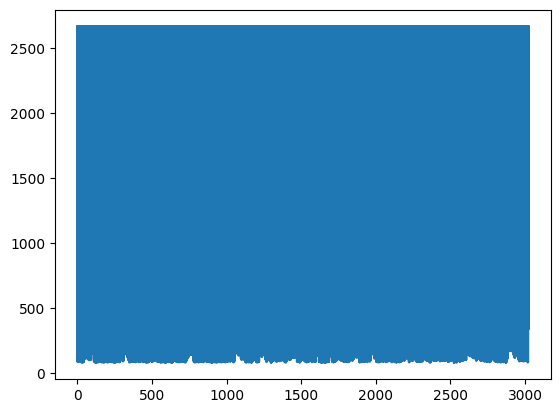

In [46]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,1)
end_time = wav0.shape[1]/sr0
time = torch.linspace(0, end_time, pitch.shape[1])
axs.plot(time, pitch[0], linewidth=2)
plt.show(block=False)

#plt.scatter(range(0,len(pitch.squeeze())), pitch.squeeze())

In [24]:
window = (int)(sr * 0.05)
hop = (int)(sr * 0.03)

mean_list = []
median_list = []
std_list = []

for i in range(0, (int)(len(wav.squeeze())), hop):
    
    aud_win = wav.squeeze()[i:(i+window)]
    #print(len(aud_win), aud_win.median())
    mean_list.append(aud_win.mean().numpy())
    median_list.append(aud_win.median().numpy())
    std_list.append(aud_win.std().numpy())


In [28]:
import statistics

mean_np = pd.Series(mean_list)
median_np = pd.Series(median_list)
std_np = pd.Series(std_list)

print(np.std(std_np))

0.023450571103386005
